In [1]:
%matplotlib notebook

import os, sys, tqdm
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imsave
import pandas as pd
import pyclesperanto_prototype as cle
import napari

sys.path.append('utils')
import register_icp as icp2
import icp_known_correspondence as icp1

from importlib import reload
reload(icp1)
reload(icp2)

<module 'register_icp' from 'utils\\register_icp.py'>

In [2]:
folders = [
#     os.path.join('..','HCR_time_course','hpf08','Panel1','2021-09-20_084304'), # reference for hpf08
#     os.path.join('..','HCR_time_course','hpf08','Panel1','2021-09-20_084954'), # 
#     os.path.join('..','HCR_time_course','hpf08','Panel1','2021-09-20_085804'), # 
    

#     os.path.join('..','HCR_time_course','hpf10','Panel1','2021-09-20_104647'), # reference for hpf10
# ##     os.path.join('..','HCR_time_course','hpf10','Panel1','2021-09-20_104949'), # 
# ##     os.path.join('..','HCR_time_course','hpf10','Panel1','2021-09-20_105356'), # 
    
#     os.path.join('..','HCR_time_course','hpf10','Panel2','2021-10-26_072116'),
# ##     os.path.join('..','HCR_time_course','hpf10','Panel2','2021-10-26_072414'),
    
# ##     os.path.join('..','HCR_time_course','hpf10','Panel3','2021-10-26_101501'),
# ##     os.path.join('..','HCR_time_course','hpf10','Panel3','2021-10-26_101721'),
#     os.path.join('..','HCR_time_course','hpf10','Panel3','2021-10-26_102004'),

#     os.path.join('..','HCR_time_course','hpf10','Panel4','2021-10-26_104907'),
# #     os.path.join('..','HCR_time_course','hpf10','Panel4','2021-10-26_105128'),


    os.path.join('..','HCR_time_course','hpf12','Panel1','2021-09-20_110602'), # reference for hpf12
#     os.path.join('..','HCR_time_course','hpf12','Panel1','2021-09-20_105648'), # 

    os.path.join('..','HCR_time_course','hpf12','Panel2','2021-10-26_104331'), 

#     os.path.join('..','HCR_time_course','hpf12','Panel3','2021-10-26_110047'),  
    os.path.join('..','HCR_time_course','hpf12','Panel3','2021-10-26_110714'),  

    os.path.join('..','HCR_time_course','hpf12','Panel4','2021-10-26_111407'),  
#     os.path.join('..','HCR_time_course','hpf12','Panel4','2021-10-26_111929'),  
]



In [23]:
fluos_dfs = [
    pd.read_csv(os.path.join(i,'cells_segmented','cell_fluo_WarpReg.csv')) for i in folders    
]

# fluos_dfs = [i[i.density>50] for i in fluos_dfs]
# fluos_dfs = [i.sample(500) for i in fluos_dfs]
n=len(fluos_dfs)

markers_dict = {
    'Panel1':['hand2','emx3','sox10','sp5l','nkx2.4b'],
    'Panel2':['pax2a','meox1','foxa2'],
    'Panel3':['ta','aldh1a2','sox17'],
    'Panel4':['sox1','prdm1','otx2']
}
markers = [markers_dict[folder.split(os.sep)[-2]] for folder in folders]

In [24]:
fluos_dfs[0]

,z,y,x,z_unit,y_unit,x_unit,density,h2bgfp,hand2,emx3,sox10,sp5l,nkx2.4b
0,21.0,1134.0,1022.0,-0.955850,0.022374,-0.108465,36.0,81.2500,0.0275,0.0,43.9925,4.7200,0.0
1,21.0,1166.0,1028.0,-0.955850,0.058139,-0.101759,35.0,98.5700,0.2075,0.0,81.8525,3.5075,0.0
2,21.0,1186.0,1098.0,-0.955850,0.080492,-0.023523,39.0,93.2125,0.0200,0.0,15.8700,3.4875,0.0
3,21.0,1196.0,966.0,-0.955850,0.091669,-0.171054,38.0,153.2850,0.3925,0.0,43.0800,19.1200,0.0
4,21.0,1202.0,1014.0,-0.955850,0.098375,-0.117406,40.0,145.2675,4.7775,0.0,51.7425,5.4500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23606,368.0,1102.0,1176.0,1.033002,-0.013391,0.063654,33.0,145.1375,0.5825,0.0,22.1225,1.7475,0.0
23607,368.0,1114.0,1140.0,1.033002,0.000021,0.023418,26.0,136.7125,0.3100,0.0,401.4675,6.0050,0.0
23608,368.0,1134.0,1098.0,1.033002,0.022374,-0.023523,26.0,113.2275,0.6750,0.0,23.8550,2.3350,0.0
23609,368.0,1134.0,1138.0,1.033002,0.022374,0.021183,30.0,128.1500,0.4000,0.0,18.1700,1.2175,0.0


<IPython.core.display.Javascript object>


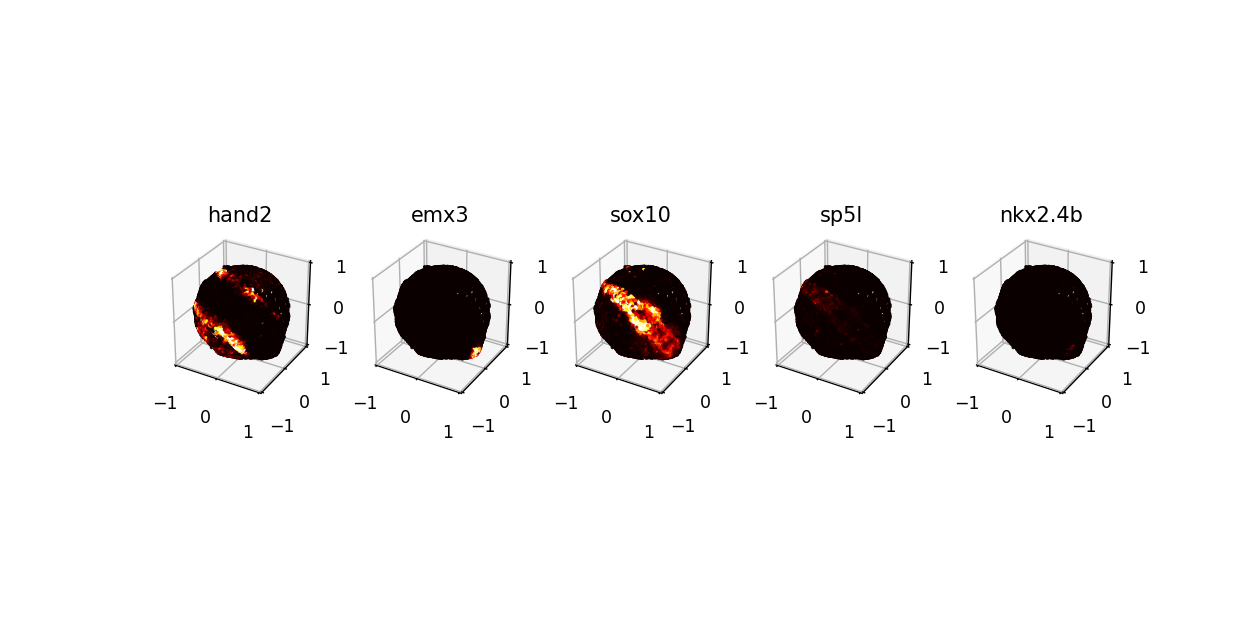

<IPython.core.display.Javascript object>


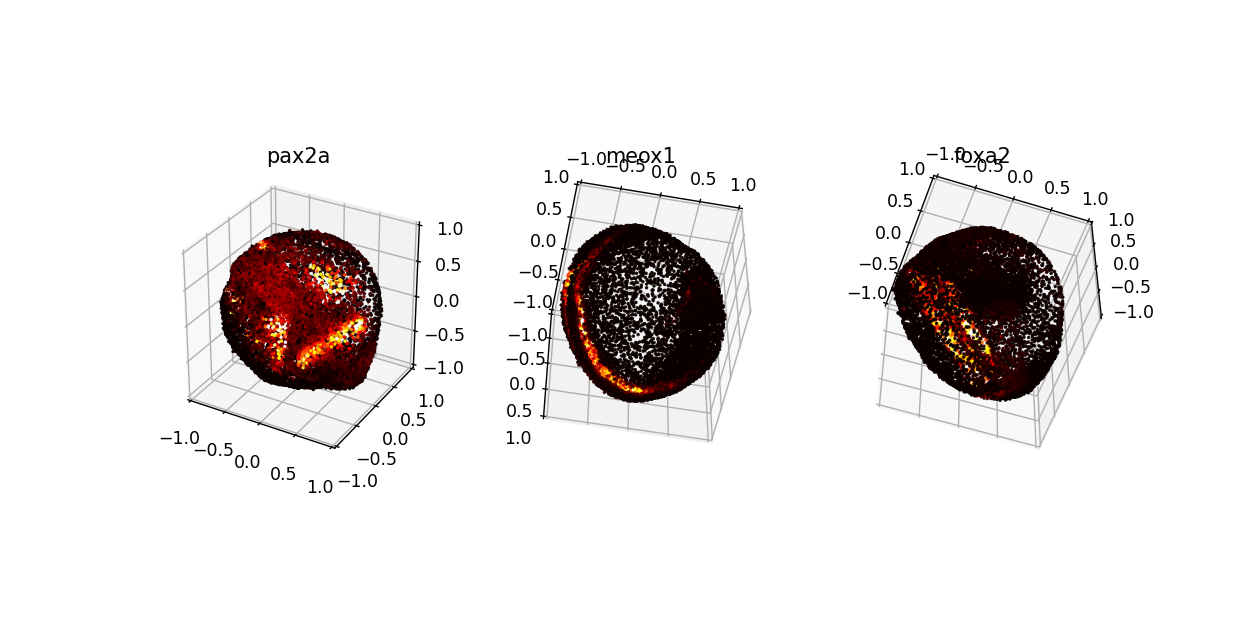

<IPython.core.display.Javascript object>


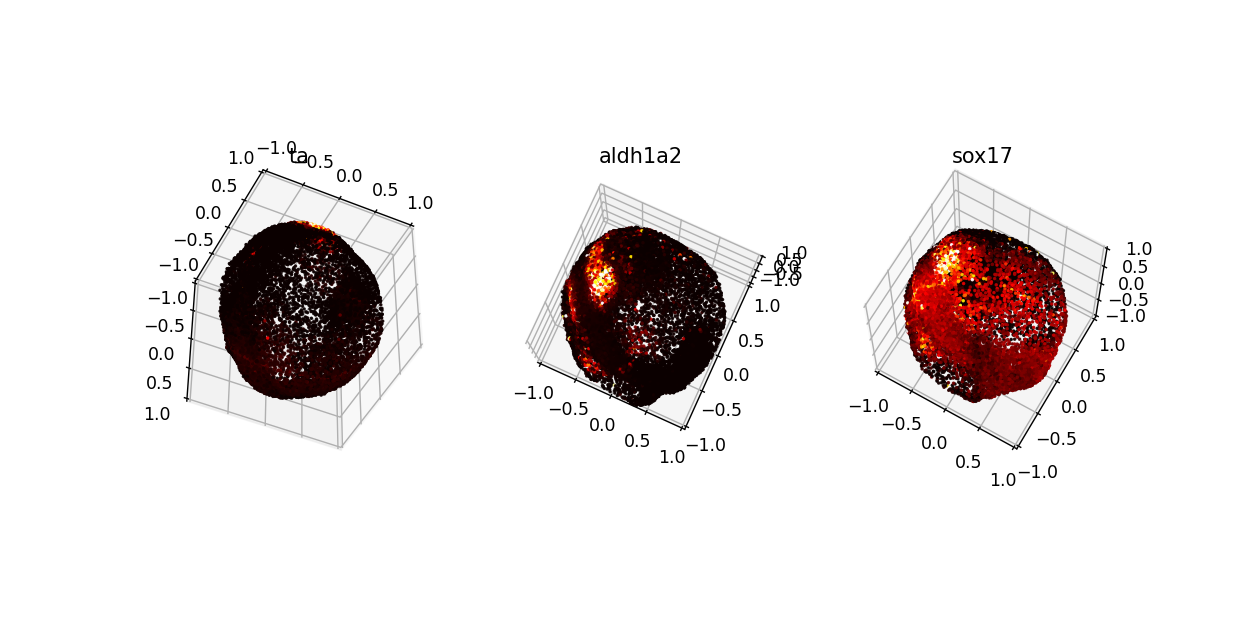

<IPython.core.display.Javascript object>


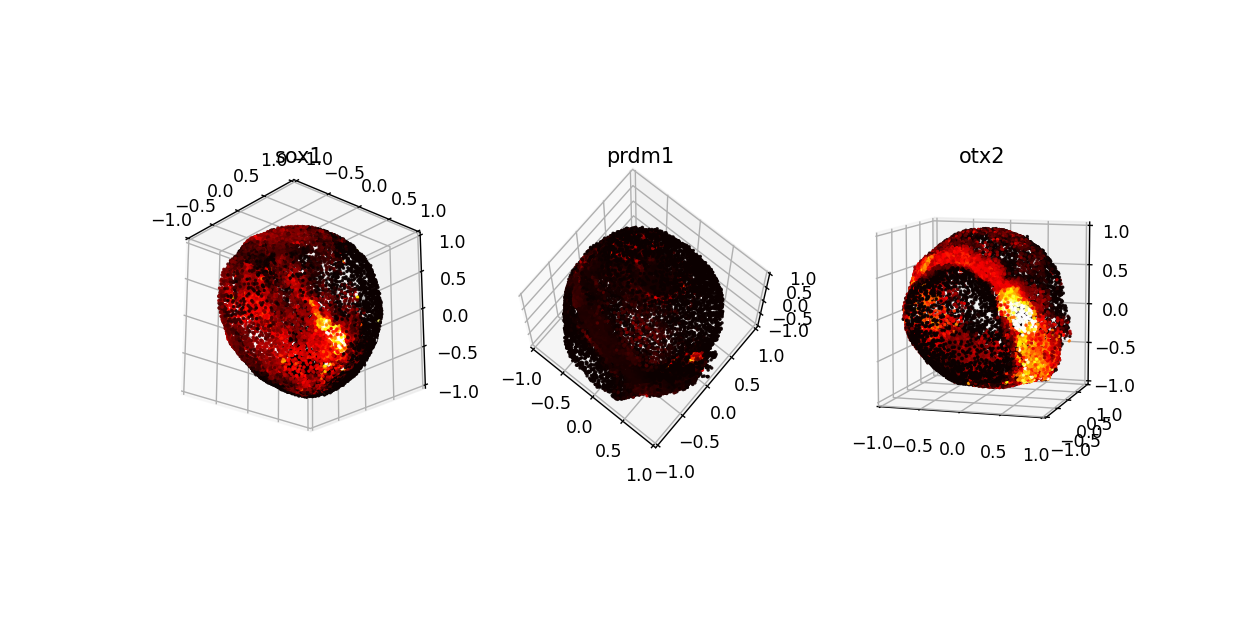

In [30]:
for i in range(len(fluos_dfs)):
    df = fluos_dfs[i].sample(15000)
    genes = markers[i]
    n = len(genes)
    
    fig1 = plt.figure(figsize=(10,5))
    ax = [fig1.add_subplot(1,n,j+1,projection='3d') for j in range(n)]

    # ax.imshow(img_gauss[z])
    for j in range(n):
        ax[j].scatter( df.x_unit, df.y_unit, df.z_unit, 
                      alpha=0.9, 
                      c=df[genes[j]],
                      s=1,
                      cmap='hot',
                      vmin=np.percentile(df[genes[j]],30),
                      vmax=np.percentile(df[genes[j]],99)
                     )
        ax[j].set_xlim(-1,1)
        ax[j].set_ylim(-1,1)
        ax[j].set_zlim(-1,1)
        ax[j].set_box_aspect([1,1,1])
        ax[j].set_title(genes[j])

# Integrate HCR data from different panels

Use nearest neighbor to compute the average expression levels of the N closest point for every channel in the HCR data from every Panel

In [31]:
from sklearn.neighbors import NearestNeighbors
query = fluos_dfs[0][['x_unit','y_unit','z_unit']].to_numpy()

j=0
for data in fluos_dfs:
    ref = data[['x_unit','y_unit','z_unit']].to_numpy()
    nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(ref)
    distances, indices = nbrs.kneighbors(query)
    
    ref_genes = data[markers[j]].to_numpy()
    
    for gene in markers[j]:
        gene_idx = markers[j].index(gene)
        fluos_dfs[0][gene] = np.mean(ref_genes[indices,gene_idx],1)
    j+=1
    
df_integrated = fluos_dfs[0].copy()

In [32]:
df_integrated

,z,y,x,z_unit,y_unit,x_unit,density,h2bgfp,hand2,emx3,...,nkx2.4b,pax2a,meox1,foxa2,ta,aldh1a2,sox17,sox1,prdm1,otx2
0,21.0,1134.0,1022.0,-0.955850,0.022374,-0.108465,36.0,81.2500,0.054167,0.0,...,0.0,49.352500,92.778333,45.040833,43.013333,52.910000,41.153333,45.023333,60.350000,48.500833
1,21.0,1166.0,1028.0,-0.955850,0.058139,-0.101759,35.0,98.5700,0.936667,0.0,...,0.0,50.995833,90.058333,44.620000,43.183333,53.325833,41.395000,45.949167,62.891667,49.435000
2,21.0,1186.0,1098.0,-0.955850,0.080492,-0.023523,39.0,93.2125,0.150000,0.0,...,0.0,50.125833,69.257500,44.677500,43.680000,55.175833,41.213333,46.470833,62.092500,49.586667
3,21.0,1196.0,966.0,-0.955850,0.091669,-0.171054,38.0,153.2850,5.946667,0.0,...,0.0,56.124167,67.428333,43.944167,41.853333,52.394167,41.081667,44.377500,62.195833,45.068333
4,21.0,1202.0,1014.0,-0.955850,0.098375,-0.117406,40.0,145.2675,8.116667,0.0,...,0.0,50.210833,68.350833,43.336667,42.967500,56.476667,41.260833,46.695000,60.388333,58.097500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23606,368.0,1102.0,1176.0,1.033002,-0.013391,0.063654,33.0,145.1375,0.744167,0.0,...,0.0,44.855833,59.225000,43.455833,45.106667,55.586667,43.445000,44.754167,61.680833,57.708333
23607,368.0,1114.0,1140.0,1.033002,0.000021,0.023418,26.0,136.7125,0.300000,0.0,...,0.0,44.039167,55.246667,43.180833,44.745000,54.605000,43.337500,44.800833,56.152500,52.913333
23608,368.0,1134.0,1098.0,1.033002,0.022374,-0.023523,26.0,113.2275,0.404167,0.0,...,0.0,45.645000,60.004167,43.454167,44.369167,54.883333,43.446667,46.125000,53.397500,49.682500
23609,368.0,1134.0,1138.0,1.033002,0.022374,0.021183,30.0,128.1500,0.300000,0.0,...,0.0,44.485833,54.128333,43.070000,44.691667,54.275000,43.127500,46.676667,58.333333,53.998333


Visualize the expression pattern of one marker gene in the 3 different panels and the synthetic reconstruction of the marker in the first panel

<IPython.core.display.Javascript object>


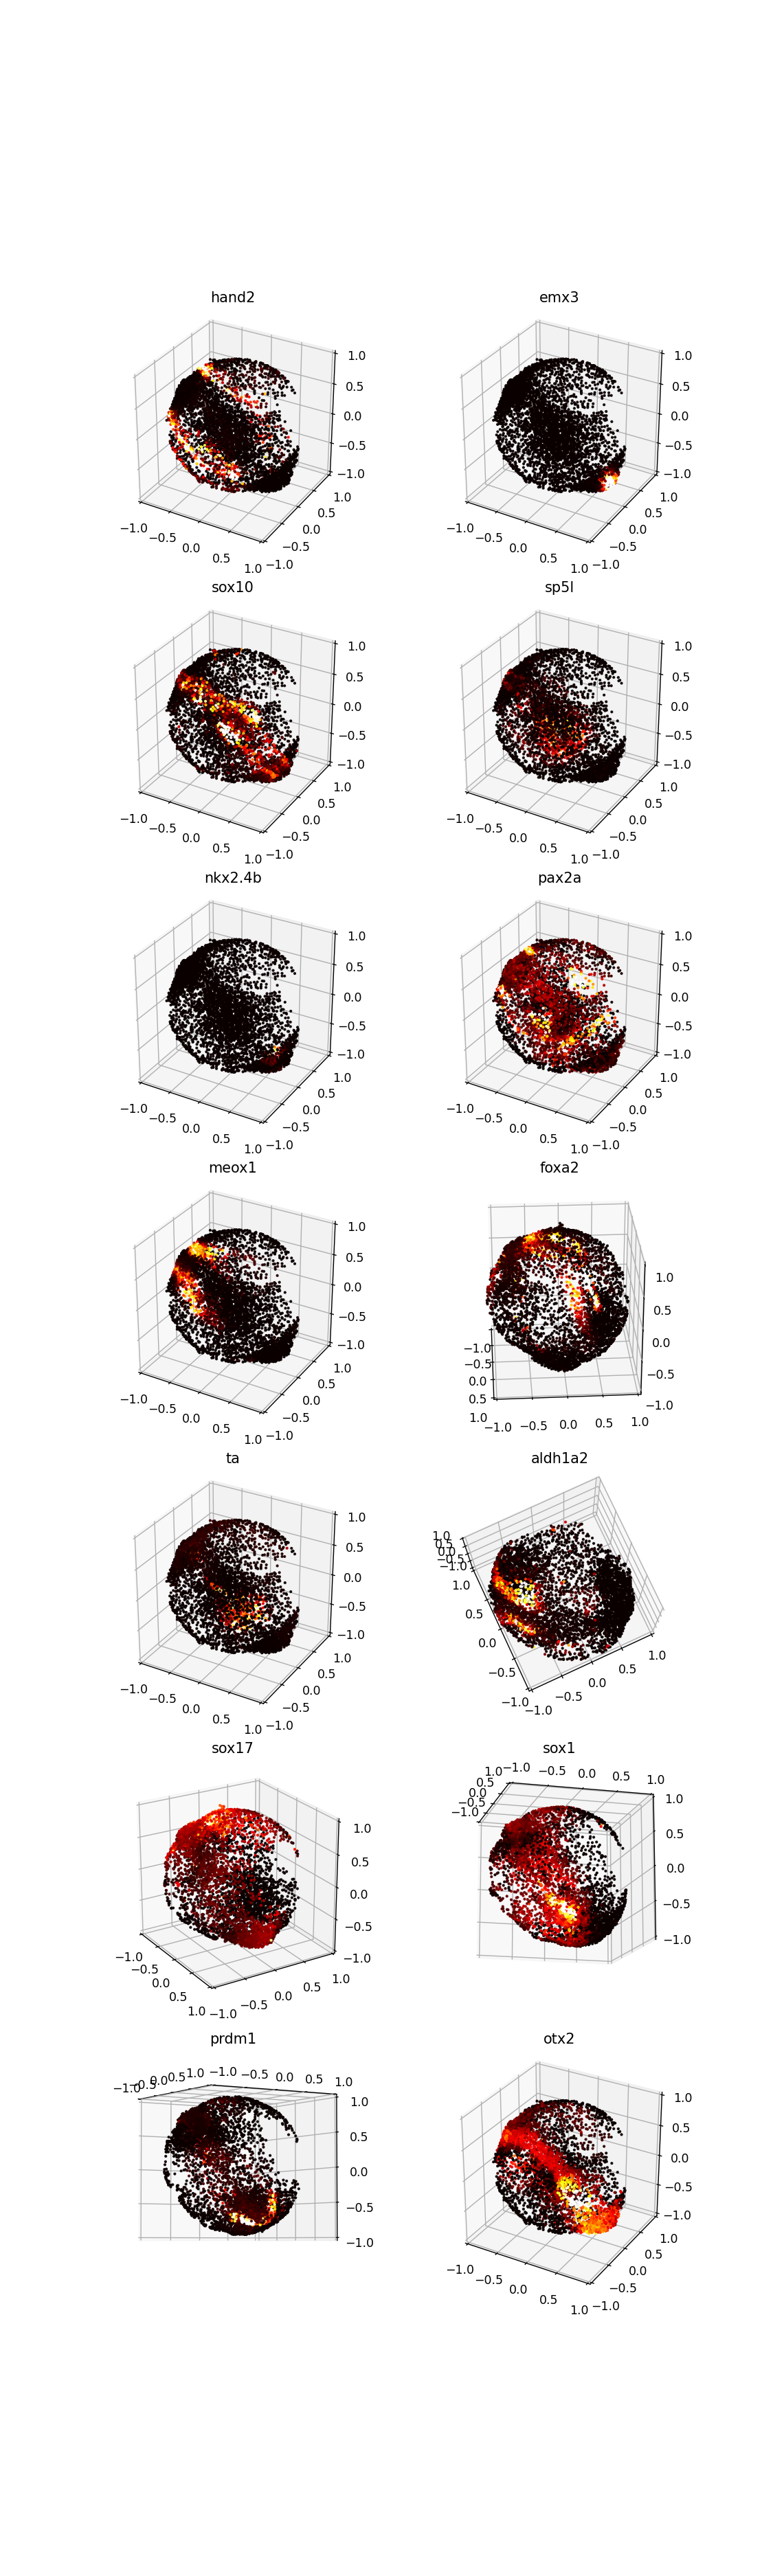

In [38]:
df_sampled = df_integrated[df_integrated.density>20]
df_sampled = df_sampled.sample(5000)

markers_flat = [i for j in markers for i in j]
n = len(markers_flat)

fig1 = plt.figure(figsize=(9,30))
ax = [fig1.add_subplot(n//2,2,i+1,projection='3d') for i in range(n)]

# ax.imshow(img_gauss[z])
for i in range(n):
    ax[i].scatter( df_sampled.x_unit, df_sampled.y_unit, df_sampled.z_unit, 
                  alpha=0.9, 
                  c=df_sampled[markers_flat[i]],
                  s=2,
                  cmap='hot',
                  vmin=np.percentile(df_integrated[markers_flat[i]], 30),
                  vmax=np.percentile(df_integrated[markers_flat[i]], 99),
                 )
    ax[i].set_xlim(-1,1)
    ax[i].set_ylim(-1,1)
    ax[i].set_zlim(-1,1)
    ax[i].set_box_aspect([1,1,1])
    ax[i].set_title(markers_flat[i])


Visualize correlation of gene expression between the first and the other panels for all marker genes

# construct an anndata object of the integrated dataset

In [39]:
import anndata as ad

df = df_integrated

# find out all the genes:
gene_list = [i for j in markers for i in j]
# extract gene expression levels for all cells
X = df[gene_list].to_numpy()

# construct observation dataframe
obs = df[['x_unit','y_unit','z_unit','density','h2bgfp']]
obs = obs.rename(columns={'x_unit':'x','y_unit':'y','z_unit':'z'})

# build anndata object and append var_names=name of genes
adata = ad.AnnData(X, obs=obs)
adata.var_names = gene_list

C:\Users\nicol\anaconda3\envs\scaling\lib\site-packages\anndata\_core\anndata.py:119: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [40]:
adata

AnnData object with n_obs × n_vars = 23611 × 14
    obs: 'x', 'y', 'z', 'density', 'h2bgfp'

In [41]:
adata.var_names

Index(['hand2', 'emx3', 'sox10', 'sp5l', 'nkx2.4b', 'pax2a', 'meox1', 'foxa2',
       'ta', 'aldh1a2', 'sox17', 'sox1', 'prdm1', 'otx2'],
      dtype='object')

In [42]:
adata.obs

,x,y,z,density,h2bgfp
0,-0.108465,0.022374,-0.955850,36.0,81.2500
1,-0.101759,0.058139,-0.955850,35.0,98.5700
2,-0.023523,0.080492,-0.955850,39.0,93.2125
3,-0.171054,0.091669,-0.955850,38.0,153.2850
4,-0.117406,0.098375,-0.955850,40.0,145.2675
...,...,...,...,...,...
23606,0.063654,-0.013391,1.033002,33.0,145.1375
23607,0.023418,0.000021,1.033002,26.0,136.7125
23608,-0.023523,0.022374,1.033002,26.0,113.2275
23609,0.021183,0.022374,1.033002,30.0,128.1500


In [43]:
adata.X

array([[5.4166667e-02, 0.0000000e+00, 3.4851665e+01, ..., 4.5023335e+01,
        6.0349998e+01, 4.8500832e+01],
       [9.3666667e-01, 0.0000000e+00, 5.0351665e+01, ..., 4.5949165e+01,
        6.2891666e+01, 4.9435001e+01],
       [1.5000001e-01, 0.0000000e+00, 1.7125000e+01, ..., 4.6470833e+01,
        6.2092499e+01, 4.9586666e+01],
       ...,
       [4.0416667e-01, 0.0000000e+00, 2.0921667e+01, ..., 4.6125000e+01,
        5.3397499e+01, 4.9682499e+01],
       [3.0000001e-01, 0.0000000e+00, 3.8357916e+02, ..., 4.6676666e+01,
        5.8333332e+01, 5.3998333e+01],
       [3.0000001e-01, 0.0000000e+00, 3.8357916e+02, ..., 4.4800835e+01,
        5.6152500e+01, 5.2913334e+01]], dtype=float32)

In [44]:
synthetic_fish_file = os.path.join('..','HCR_time_course','hpf12_synthetic_HCR.h5')
adata.write(filename=synthetic_fish_file)

# Align fish to have head to the right and straight up

In [5]:
import scanpy as sc

synthetic_fish_file = os.path.join('..','HCR_time_course','hpf12_synthetic_HCR.h5')
adata = sc.read_h5ad(synthetic_fish_file)

In [6]:
adata

AnnData object with n_obs × n_vars = 23611 × 14
    obs: 'x', 'y', 'z', 'density', 'h2bgfp'

In [ ]:
point_list = [[],[]]